# Task description

We have IMDB dataset. It consists of reviews to films and label is the review is good or not. Your target is creating the algorithm that allows as predict the label based on the review

# 1. Import needed libraries and packages

In [39]:
!pip install -q tf_nightly

In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# 2. Upload the dataset. Data preparation

In [72]:
imdb = keras.datasets.imdb
# Use here only 10000 words that use mostly. We exclude words uses not so often
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [73]:
# From the list of all records display the first one to see that the example of data
print(train_data[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


Create the function to transform integers in real words

In [43]:
"""# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])"""

In [44]:
"""# Show data for the first record
decode_review(train_data[0])"""

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

We make the conclusion that data in the dataset is not words. It's numbers.

In [74]:
len(train_data), len(test_data)

(25000, 25000)

We also see that we have 25000 objects in each dataset. 

In [75]:
# Display length for a couple of reviews
len(train_data[1]), len(train_data[3])

(189, 550)

Length of each review might be different. So, It's important when we create a matrix to train the model. 
We should transform all review to the length of the same value.

In [76]:
# Define max length for all objects in the dataset
max_len = len(train_data[1])
for i in train_data:
    if len(train_data[i])>=max_len:
        max_len=len(train_data[i])
print(max_len)

2494


In [77]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=2494)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=2494)

# 3. Build the model

In [49]:
# Input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000
model = keras.Sequential()
# Embedding layer converts testing data in multi-dimensional space (words with somilar sentiment will 
# have the similar direction)
model.add(keras.layers.Embedding(vocab_size, 16))
# GlobalAveragePooling1D returns a fixed-length output vector for each example by averaging 
# over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
model.add(keras.layers.GlobalAveragePooling1D())
# Usual Dense layer 
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
# Dense layer with sigmoid activation function to predict the probability
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model using binary_crossentropy as the loss function and accuracy as metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

# 4. Train the model

In [51]:
# Create test and validation datasets from train dataset
x_val = train_data[:5000]
partial_x_train = train_data[5000:]

y_val = train_labels[:5000]
partial_y_train = train_labels[5000:]

In [52]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 14s 684us/sample - loss: 0.6930 - acc: 0.5107 - val_loss: 0.6929 - val_acc: 0.4930
Epoch 2/50
20000/20000 [==============================] - 13s 664us/sample - loss: 0.6926 - acc: 0.5188 - val_loss: 0.6924 - val_acc: 0.5014
Epoch 3/50
20000/20000 [==============================] - 14s 694us/sample - loss: 0.6916 - acc: 0.5467 - val_loss: 0.6909 - val_acc: 0.6158
Epoch 4/50
20000/20000 [==============================] - 12s 602us/sample - loss: 0.6895 - acc: 0.6126 - val_loss: 0.6877 - val_acc: 0.6808
Epoch 5/50
20000/20000 [==============================] - 12s 605us/sample - loss: 0.6854 - acc: 0.6151 - val_loss: 0.6832 - val_acc: 0.6054
Epoch 6/50
20000/20000 [==============================] - 11s 565us/sample - loss: 0.6784 - acc: 0.6774 - val_loss: 0.6749 - val_acc: 0.6284
Epoch 7/50
20000/20000 [==============================] - 12s 576us/sample - loss: 0.6672 - acc: 0.6809 -

We see that starting from 35 epochs, accuracy do not change a lot. Probably, 35 epochs are a good amount of epochs for us.

# 5. Estimate model results

We can draw charts for accuracy and loss for train and validation datasets

In [65]:
# Make some preparation before display data
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [66]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [67]:
epochs = range(1,51)

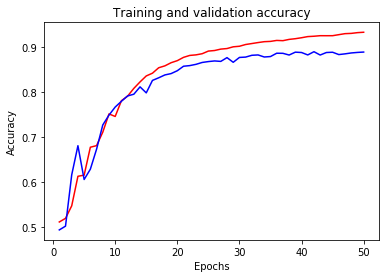

In [68]:
# Accuracy
plt.plot(epochs, acc, color = 'red', label='Training loss')
plt.plot(epochs, val_acc, color = 'blue', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()

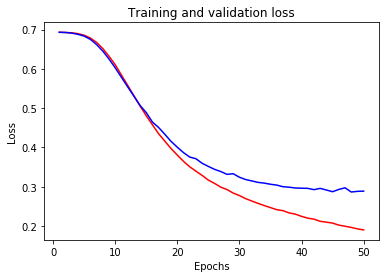

In [69]:
# Loss
plt.plot(epochs, loss, color = 'red', label='Training loss')
plt.plot(epochs, val_loss, color = 'blue', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()

# Conclusion

The model shows near 88% accuracy on validation dataset and 93% on train dataset. This result is not bad and the model can be used for label prediction based on review text. 